# this is a lab manual for neural network
## week 1 : intro to neural network


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define activation function
def step_function(x):
    return np.where(x >= 0, 1, 0)

In [3]:
# define the preceptron model
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1) # Including bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, x):
        summation = np.dot(x, self.weights[1:]) + self.weights[0]
        return step_function(summation)

    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights[1:] += self.learning_rate * error * X[i]
                self.weights[0] += self.learning_rate * error # bias update



In [4]:
# define the OR gate dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

In [5]:
# train the preceptron
perceptron = Perceptron(2)
perceptron.train(X, y)

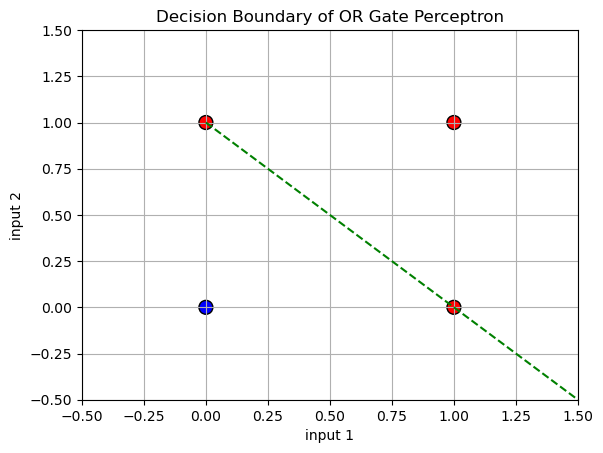

In [6]:
# viualize the percetron
x_value = np.linspace(-0.0, 1.5, 100)
y_value = -(perceptron.weights[1] * x_value + perceptron.weights[0]) / perceptron.weights[2]
# plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=100)
plt.plot(x_value, y_value, 'g--')
plt.xlabel('input 1')
plt.ylabel('input 2')
plt.title('Decision Boundary of OR Gate Perceptron')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()

In [7]:
# test the perceptron
for i in range(X.shape[0]):
    print(f'input: {X[i]}, predicted output: {perceptron.predict(X[i])}')

input: [0 0], predicted output: 0
input: [0 1], predicted output: 1
input: [1 0], predicted output: 1
input: [1 1], predicted output: 1
